# Avant de commencer, veuillez installer les packages nécessaires via le code suivant :
*pip install -r requirements.txt*

*pip install pandas numpy matplotlib seaborn scikit-lear*

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import r2_score


# Chargement des données (provenant du csv)

In [51]:
df = pd.read_csv("airbnb_data.csv")

# print("le fichier contient", df.shape[0], "lignes et", df.shape[1], "colonnes")
df 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20241206031559,2024-12-07,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,t,1,1,0,0,0.05
1,5396,https://www.airbnb.com/rooms/5396,20241206031559,2024-12-09,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.85,4.96,4.59,7510402838018,f,1,1,0,0,2.26
2,7397,https://www.airbnb.com/rooms/7397,20241206031559,2024-12-08,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.89,4.94,4.74,7510400829623,f,2,2,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20241206031559,2024-12-09,previous scrape,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.03
4,9359,https://www.airbnb.com/rooms/9359,20241206031559,2024-12-09,city scrape,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91026,1304562779094087796,https://www.airbnb.com/rooms/1304562779094087796,20241206031559,2024-12-06,city scrape,Studio ensoleillé sur Canal,"Sunny studio on Canal de l 'Ourcq, metro Laumi...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,38574929,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",t,1,1,0,0,NaN
91027,1304667478167694444,https://www.airbnb.com/rooms/1304667478167694444,20241206031559,2024-12-07,city scrape,Studio bohémien,Enjoy a Parisian life in this studio facing th...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,595527331,...,NaN,NaN,NaN,7512014848156,f,1,1,0,0,NaN
91028,1305050902233494632,https://www.airbnb.com/rooms/1305050902233494632,20241206031559,2024-12-08,city scrape,Cozy Apartment - Marais - Pelee,Just steps from the vibrant Place de la Bastil...,The apartment is located in one of the most li...,https://a0.muscache.com/pictures/prohost-api/H...,156775524,...,NaN,NaN,NaN,7511114844445,t,107,107,0,0,NaN
91029,1305061192394005038,https://www.airbnb.com/rooms/1305061192394005038,20241206031559,2024-12-07,city scrape,Cozy Apartment - Tour Eiffel - Finlay,Located in a prestigious area just a few minut...,This apartment is ideally located in a prestig...,https://a0.muscache.com/pictures/prohost-api/H...,156775524,...,NaN,NaN,NaN,7511514844533,t,107,107,0,0,NaN


In [52]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [53]:
df.beds.isnull().sum()

np.int64(31087)

In [54]:
df.isnull().mean().sort_values(ascending = False)

neighbourhood_group_cleansed                    1.000000
calendar_updated                                1.000000
host_neighbourhood                              0.646615
host_about                                      0.565225
neighborhood_overview                           0.495820
                                                  ...   
instant_bookable                                0.000000
calculated_host_listings_count                  0.000000
calculated_host_listings_count_entire_homes     0.000000
calculated_host_listings_count_private_rooms    0.000000
calculated_host_listings_count_shared_rooms     0.000000
Length: 75, dtype: float64

In [55]:
df[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']].isnull().sum()
# neighbourhood_cleansed à aucune valeurs manquantes, nous pouvons alors le garder lors de l'analyse de données

neighbourhood                   45135
neighbourhood_cleansed              0
neighbourhood_group_cleansed    91031
dtype: int64

In [56]:
df.beds.mean()

np.float64(1.7859835846790337)

In [57]:
df.property_type.value_counts()

property_type
Entire rental unit             76168
Private room in rental unit     5839
Entire condo                    2526
Room in boutique hotel          1197
Room in hotel                   1135
                               ...  
Tower                              1
Shared room in guest suite         1
Private room in cave               1
Camper/RV                          1
Private room in bungalow           1
Name: count, Length: 68, dtype: int64

In [58]:
df.beds.fillna(1, inplace = True)

C:\Users\iPhone de Gaëlle\AppData\Local\Temp\ipykernel_25524\4147998425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.beds.fillna(1, inplace = True)


# Sélection et nettoyage des données

In [59]:
df = df[['name', 'latitude', 'longitude', 'room_type', 'price',
         'minimum_nights', 'number_of_reviews', 'accommodates', 'bedrooms', 'beds',
         'review_scores_rating', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type']]

df = df.drop_duplicates()
df = df.dropna()
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Analyse des prix et des nuits minimums (avec valeurs aberrantes)


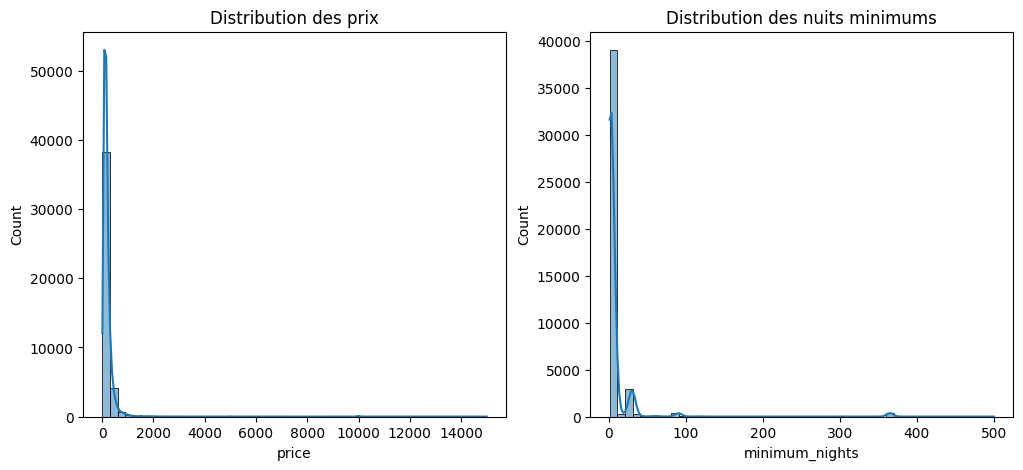

In [60]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution des prix")

plt.subplot(1,2,2)
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title("Distribution des nuits minimums")
plt.show()

# Analyse des prix dans tout paris

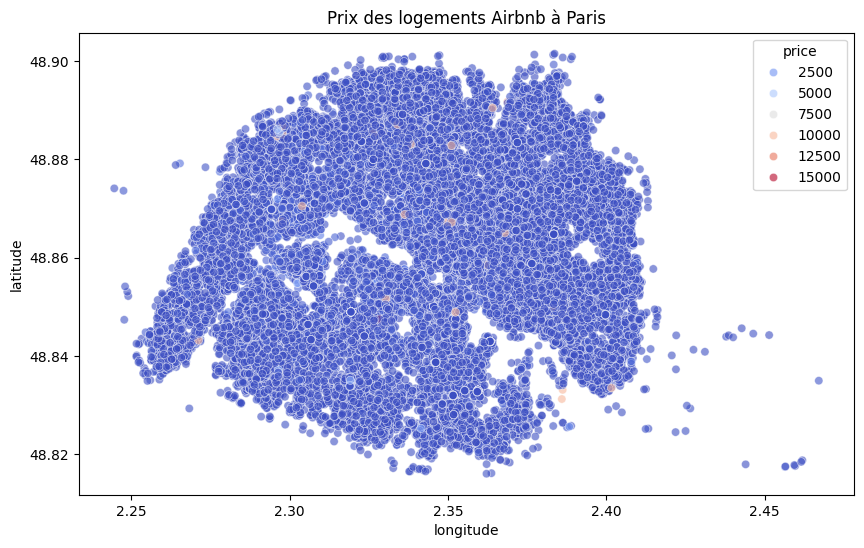

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price', palette="coolwarm", alpha=0.6)
plt.title("Prix des logements Airbnb à Paris")
plt.show()

# Analyse des prix par arrondissement

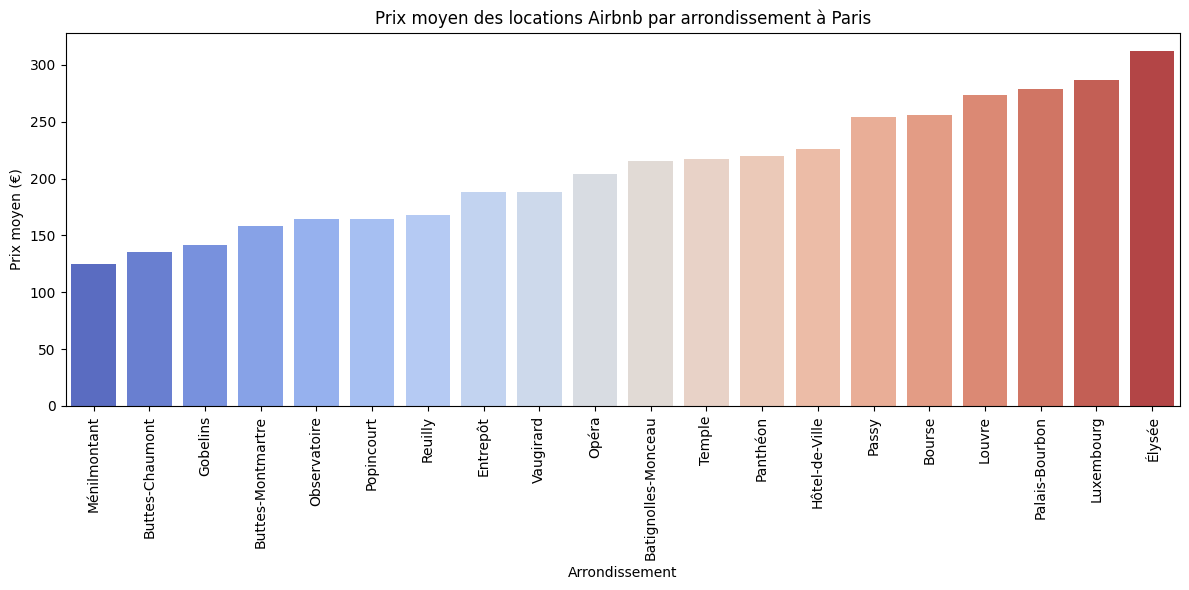

In [62]:
plt.figure(figsize=(12,6))
arrondissement_price = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values()
sns.barplot(x=arrondissement_price.index, y=arrondissement_price.values, hue=arrondissement_price.index, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.xlabel("Arrondissement")
plt.ylabel("Prix moyen (€)")
plt.title("Prix moyen des locations Airbnb par arrondissement à Paris")
plt.tight_layout() 
plt.show()

# Analyse des prix moyens par type de propriété


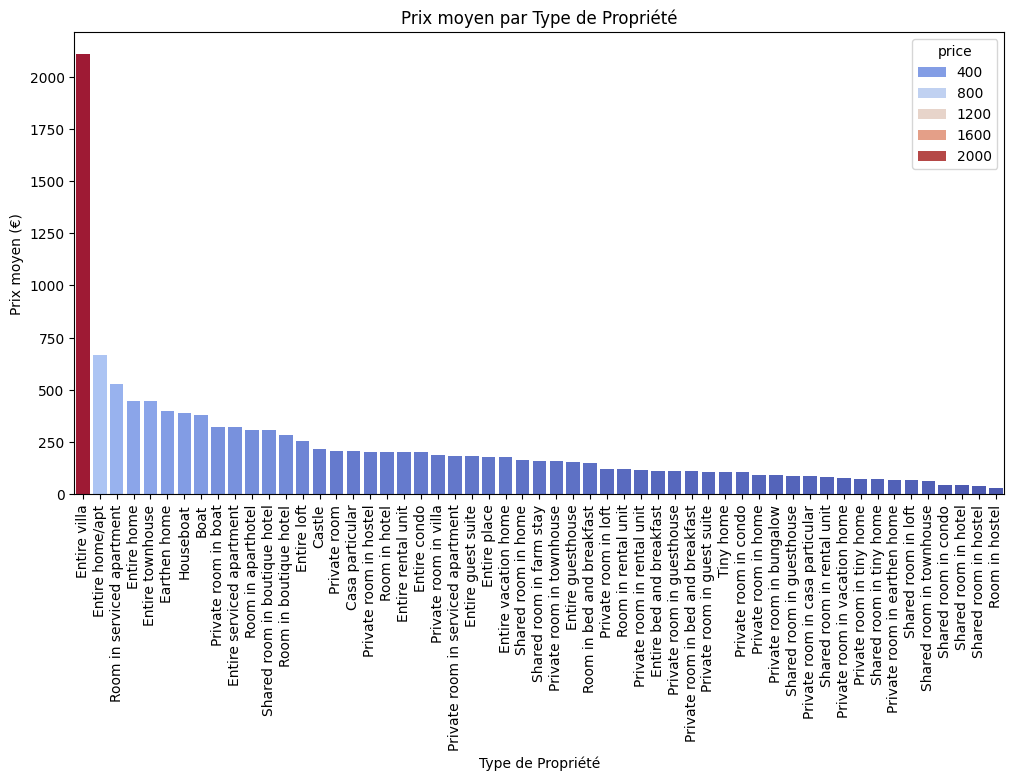

In [63]:
prix_par_type = df.groupby('property_type')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=prix_par_type.index, y=prix_par_type.values, hue=prix_par_type, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Type de Propriété")
plt.ylabel("Prix moyen (€)")
plt.title("Prix moyen par Type de Propriété")
plt.show()

Nombre de valeurs aberrantes pour 'price' : 3273
Nombre de données aberrantes supprimés : 3273


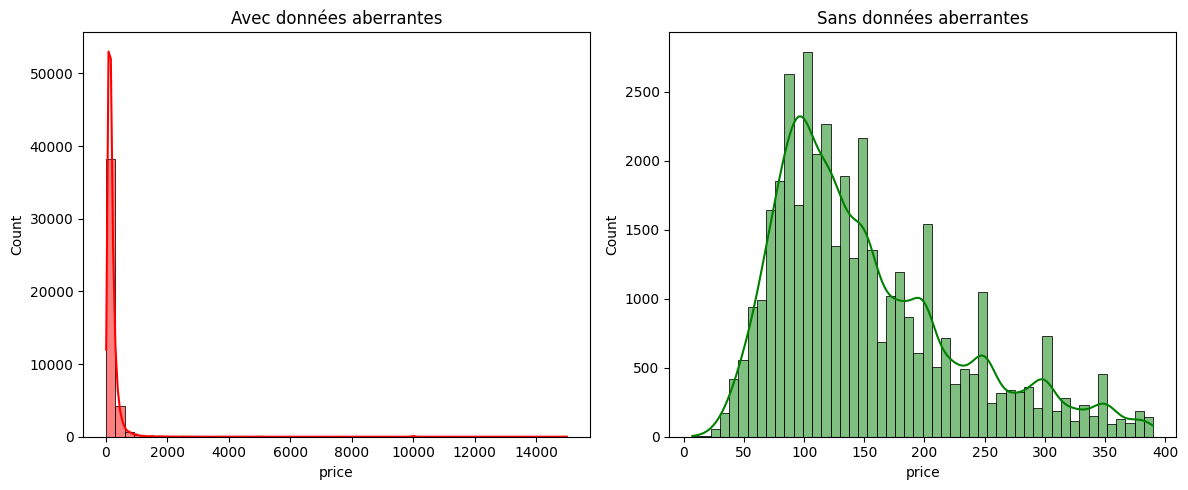

In [64]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dt_aber = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Nombre de valeurs aberrantes pour 'price' : {dt_aber.shape[0]}")
# print(dt_aber[['name', 'price']])

# suppression valeurs aberrantes
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

dt_aber_count = len(df) - len(df_clean)
print(f"Nombre de données aberrantes supprimés : {dt_aber_count}")

# ava,nt après
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='red')
plt.title("Avec données aberrantes")

plt.subplot(1, 2, 2)
sns.histplot(df_clean['price'], bins=50, kde=True, color='green')
plt.title("Sans données aberrantes")

plt.tight_layout()
plt.show()

# Régression Linéaire Simple

Coefficient de détermination R² : 0.272


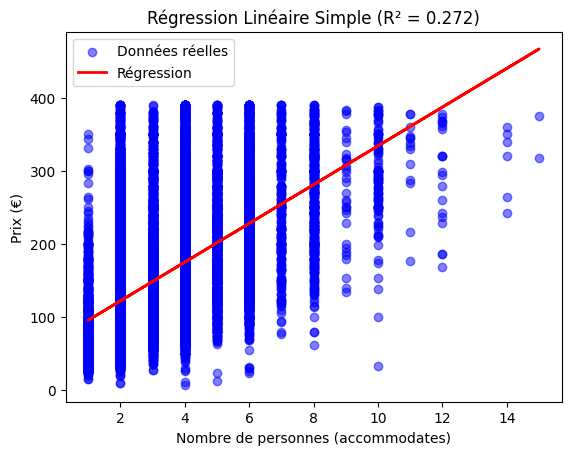

In [65]:
X = df_clean[['accommodates']]
y = df_clean['price']

model_simple = LinearRegression()
model_simple.fit(X, y)

# predictio
y_pred = model_simple.predict(X)

# coef en R²
r2 = r2_score(y, y_pred)
print(f"Coefficient de détermination R² : {r2:.3f}")

plt.scatter(X, y, color='blue', alpha=0.5, label='Données réelles')
plt.plot(X, y_pred, color='red', linewidth=2, label='Régression')
plt.xlabel("Nombre de personnes (accommodates)")
plt.ylabel("Prix (€)")
plt.title(f"Régression Linéaire Simple (R² = {r2:.3f})")
plt.legend()
plt.show()

# Régression Linéaire Multiple

Missing columns: ['reviews_per_month']


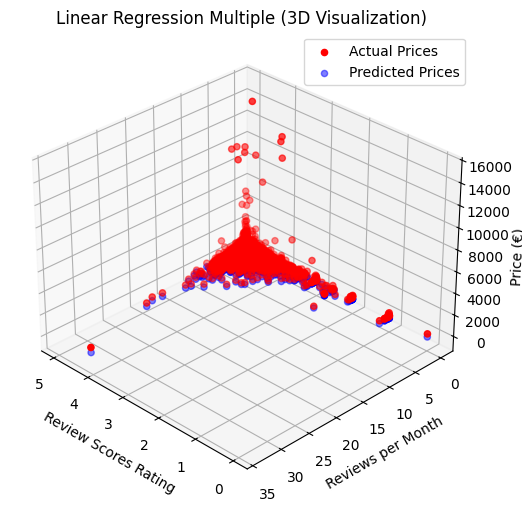

In [67]:
# Check if the required columns exist in the DataFrame
required_columns = ['review_scores_rating', 'reviews_per_month', 'price']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Proceed with dropping rows with missing values
    df_clean = df.dropna(subset=required_columns)

    # Splitting the dataset into training and testing sets
    X = df_clean[['review_scores_rating', 'reviews_per_month']]
    y = df_clean['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual prices
ax.scatter(X_test['review_scores_rating'], X_test['reviews_per_month'], y_test + 100, color='red', label='Actual Prices')

# Scatter plot of predicted prices
y_pred = model.predict(X_test)
ax.scatter(X_test['review_scores_rating'], X_test['reviews_per_month'], y_pred - 100, color='blue', alpha=0.5, label='Predicted Prices')

ax.view_init(elev=30, azim=135)


# Labels
ax.set_xlabel("Review Scores Rating")
ax.set_ylabel("Reviews per Month")
ax.set_zlabel("Price (€)")
ax.set_title("Linear Regression Multiple (3D Visualization)")

plt.legend()
plt.show()

In [ ]:
# predictio
y_pred = model.predict(X_test)

# coef en R²
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination R² : {r2:.3f}")

Coefficient de détermination R² : 0.003
